<a href="https://colab.research.google.com/github/JuanCappelletti/Consteel_H06/blob/main/ensayo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***`Analisis DATA SET de caudales oxigeno Siderca`***
---



In [30]:
#@title Ejecutar librerias { run: "auto", display-mode: "form" }
from matplotlib.font_manager import json_dump
from numpy.matrixlib.defmatrix import N
from operator import truediv
import numpy as np
import pandas as pd
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go
from IPython.display import Image
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

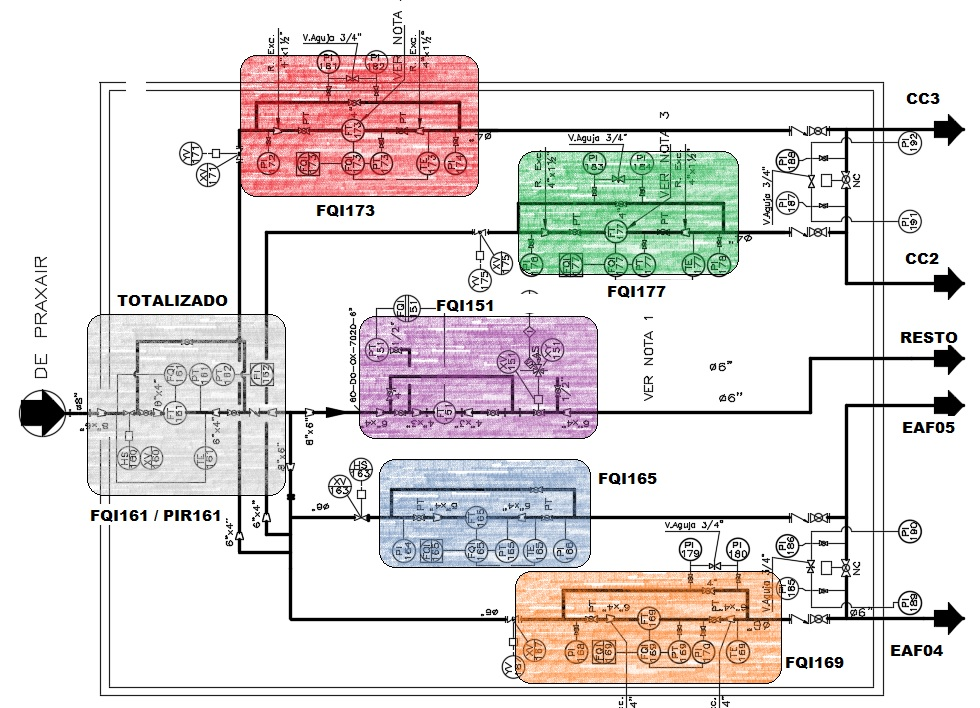

In [ ]:
#@title Diagrama burnker Siderca
Image('/content/drive/MyDrive/Colab Notebooks/ESQUEMA ENTRADA.jpg')

In [31]:
#@title CARGA DE DATA_SET 
Url = "https://raw.githubusercontent.com/JuanCappelletti/Consteel_H06/main/MUESTRA%20TOTAL.csv" #@param {type:"string"}
datos = pd.read_csv(Url,sep=";",decimal=",")
df=pd.DataFrame(datos)
dfx=df.copy()
dfx.Time= dfx.Date.values+' '+dfx.Time.values  
for i in range (len(dfx['FQI151'])):
     if (dfx['FQI151'].values[i])<=0:
         dfx['FQI151'].values[i]=0
         #print(dfx['FQI151'].values[i])

#print(dfx.loc[dfx['FQI151']==0])


In [56]:
#@title Analisis rapidos del data_set completo
a=np.array(round(dfx.FQI161.describe(),2))
b=np.array(round(dfx.PIR161.describe(),2))
c=np.array(round(dfx.FQI165.describe(),2))
d=np.array(round(dfx.FQI169.describe(),2))
e=np.array(round(dfx.FQI177.describe(),2))
f=np.array(round(dfx.FQI173.describe(),2))
g=np.array(round(dfx.FQI151.describe(),2))
h=np.array(["count","mean","std","min","25%","50%","75%","max"])
R=np.array(["Features","FQI161","PIR161","FQI165","FQI169","FQI177","FQI173","FQI151"])
ke=np.array([h,a,b,c,d,e,f,g])
dfD= pd.DataFrame(ke.T,columns=R)  

def TABLA1 (R):
 fig_A1 = go.Figure(data=[go.Table(
    header=dict(values=list(R.columns),
                fill_color='lightgray',
                align='left'),
    cells=dict(values=[R.Features,R.FQI161, R.PIR161,R.FQI165,R.FQI169,R.FQI177,R.FQI173,R.FQI151],
               fill_color='beige',
               align='left'))
  ])
 fig_A1.show()

print('Analisis rapidos.' )


TABLA1(dfD)

Analisis rapidos.


In [ ]:
print(dfx.nlargest(1,'FQI151'))


       indice        Date                Time   FQI161  PIR161  FQI165  \
19481   19482  21/10/2022  21/10/2022 7:01:29  5808.06   14.37   159.0   

        FQI169  FQI177  FQI173   FQI151  
19481  1240.78  368.21   245.2  3794.87  


Cantidad de items sampleados:  29760
Fecha de la muestra:  1/10/2022 al 31/10/2022


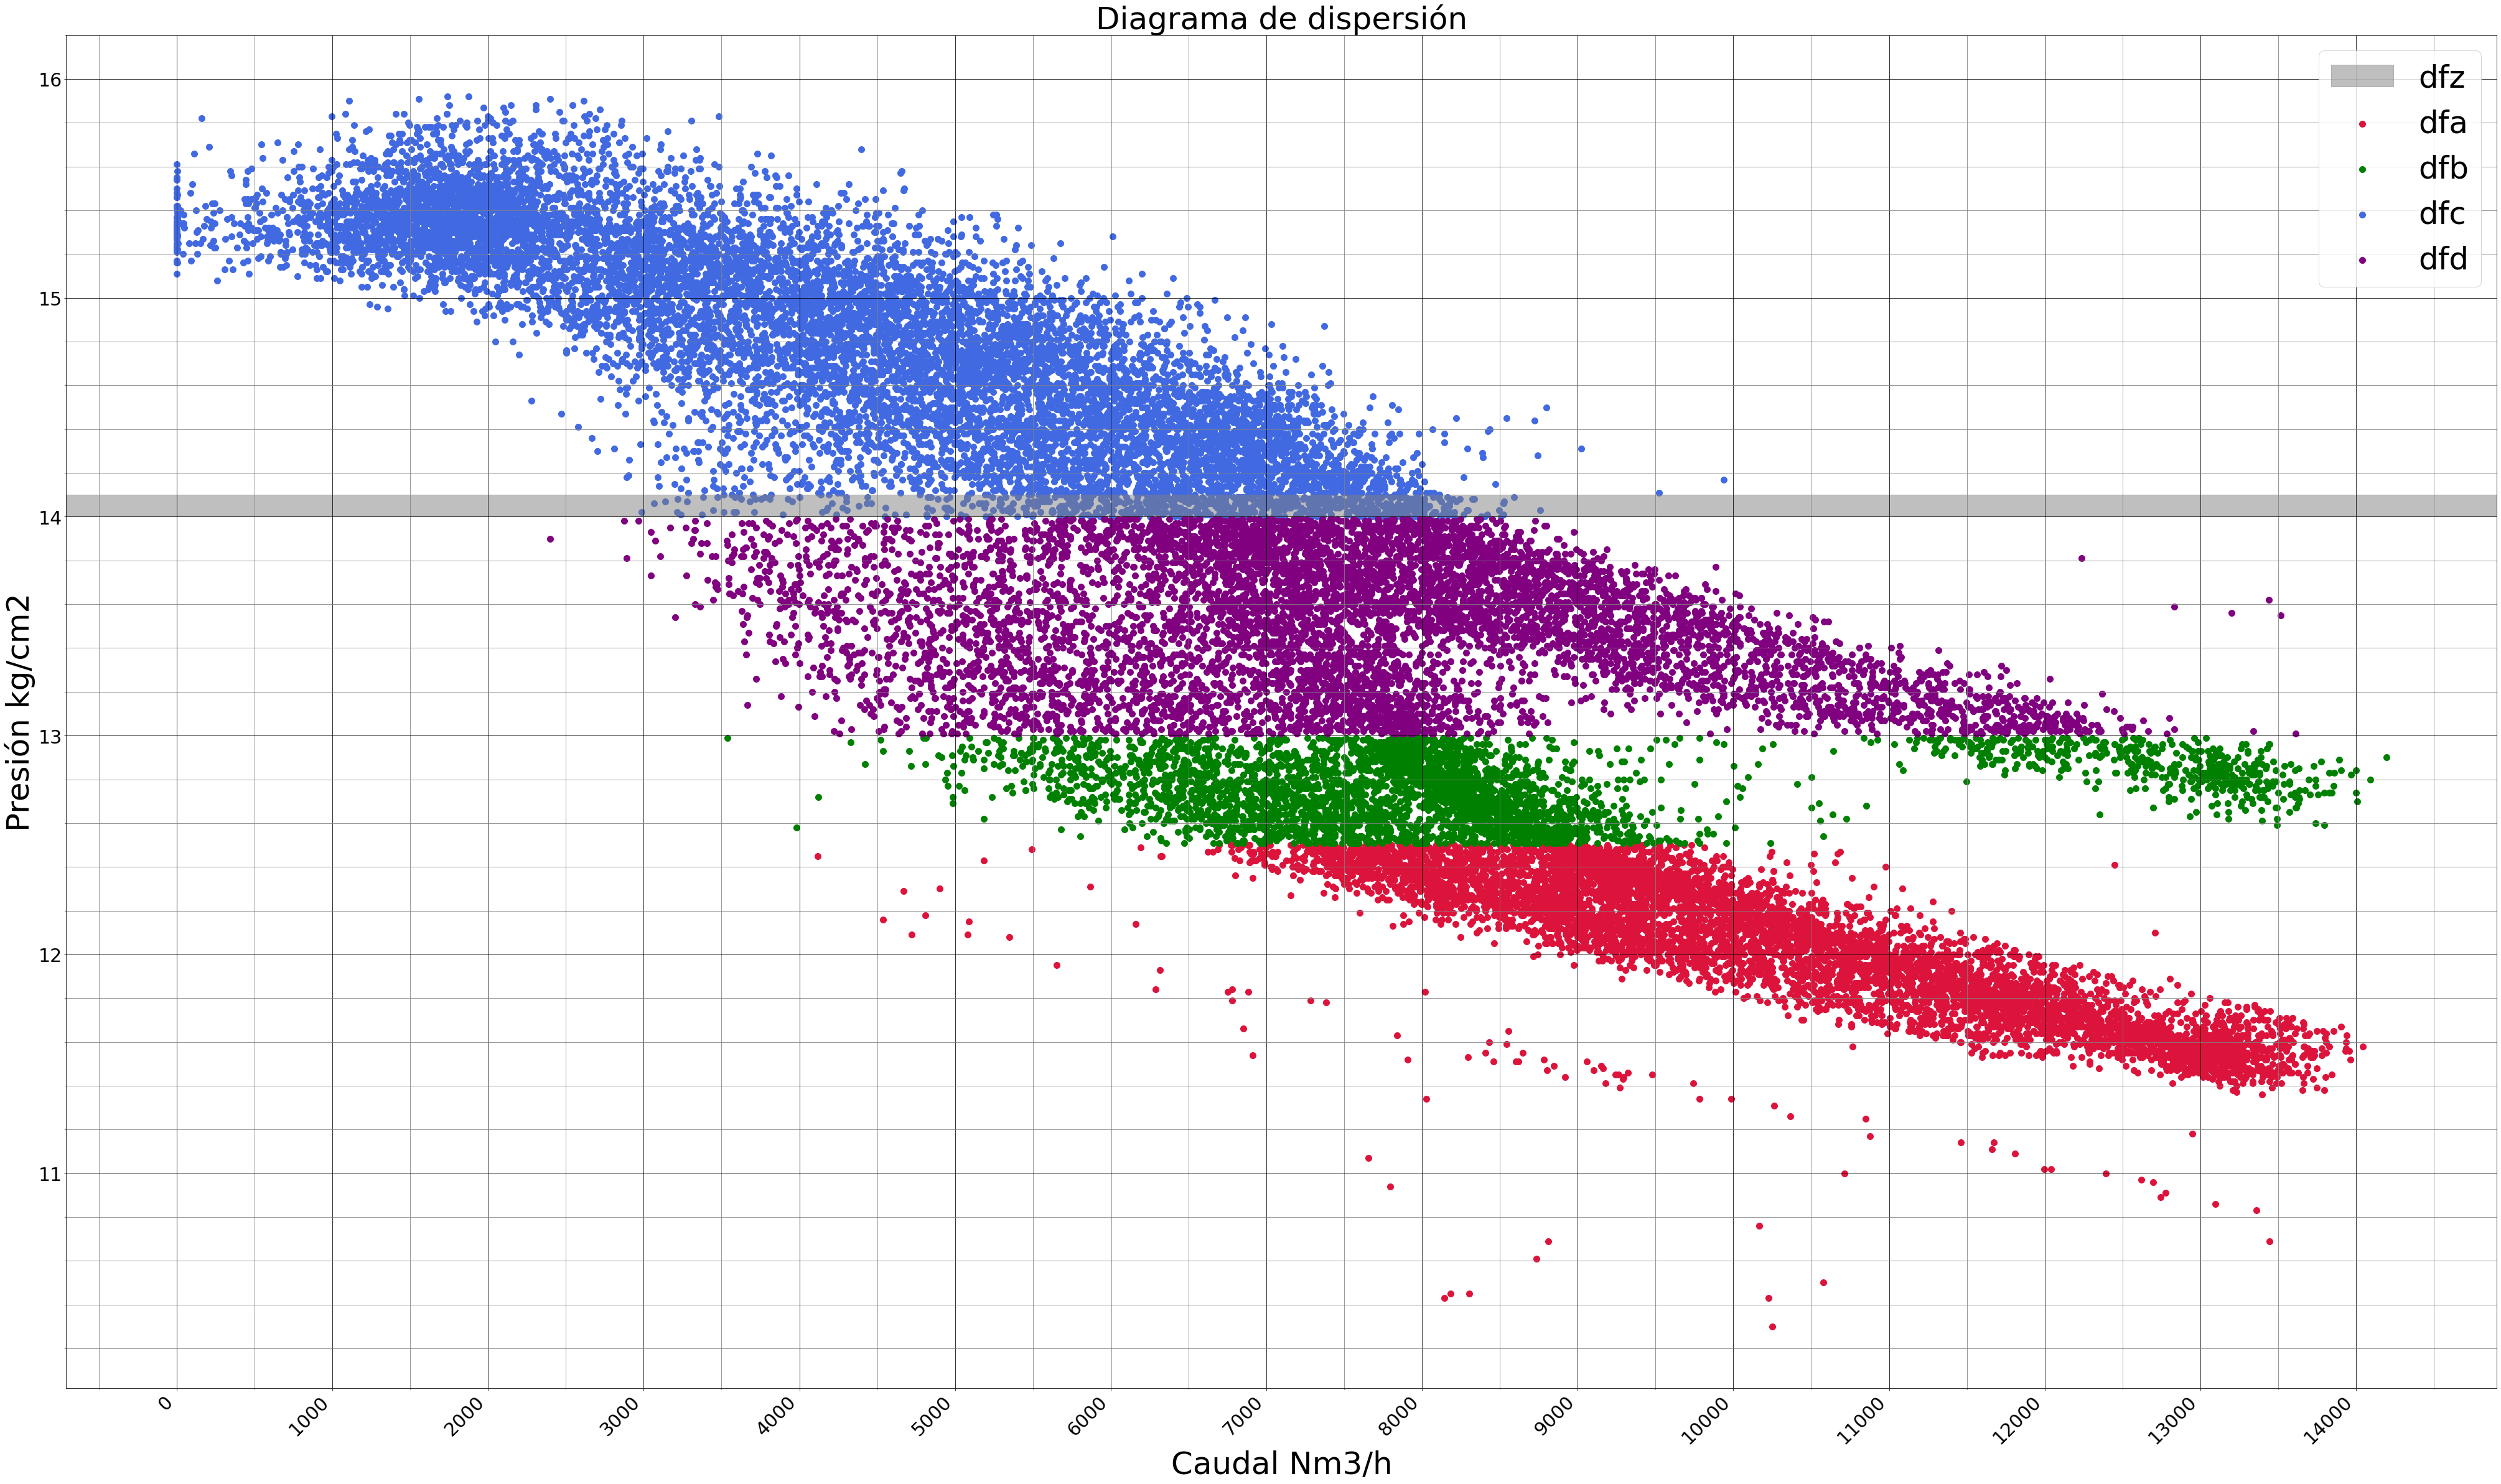

In [33]:
from pandas.core.aggregation import reconstruct_func
from io import DEFAULT_BUFFER_SIZE
#@title Densidad de muestra ( completa)

InstrumentoParametro = 'PIR161' #@param {type:"raw"}
x = 'FQI161' #@param {type:"raw"}
y = 'PIR161' #@param {type:"raw"}
text='Caudal Nm3/h'
text1='Presión kg/cm2'
choice=False
Secciones = "12.5;13;14" #@param {type:"string"}
zoom = True #@param {type:"boolean"}
Intervalo = "14;14.1" #@param {type:"string"}
labels=['dfa','dfb','dfc','dfd']
Rangos=np.array(np.mat(Secciones))
Rangos1=np.array(np.mat(Intervalo))
print('Cantidad de items sampleados: ', len(dfx.index))

print('Fecha de la muestra: ',dfx.Date[0], 'al',dfx.Date[(len(dfx.index)-1)])

fig1, ax = plt.subplots(1, figsize=(70,40))

#--------Muestreo color------
dfa = dfx.loc[dfx.loc[:,InstrumentoParametro] <= Rangos[0][0]]
dfb1= dfx.loc[dfx.loc[:,InstrumentoParametro] < Rangos[1][0]]
dfb= dfb1.loc[dfb1.loc[:,InstrumentoParametro] > Rangos[0][0]]
dfc1= dfx.loc[dfx.loc[:,InstrumentoParametro] < Rangos[2][0]]
dfc= dfc1.loc[dfc1.loc[:,InstrumentoParametro] > Rangos[1][0]]
dfd= dfx.loc[dfx.loc[:,InstrumentoParametro] >= Rangos[2][0]]



ax.scatter(dfa[x],dfa[y],color='crimson',s=100,label=labels[0])
ax.scatter(dfb[x],dfb[y],color='green',s=100,label=labels[1])
ax.scatter(dfd[x],dfd[y],color='royalblue',s=100,label=labels[2])
ax.scatter(dfc[x],dfc[y],color='purple',s=100,label=labels[3])

#------- muetra zoom---------------
if zoom == True:
  dfz1= dfx.loc[dfx.loc[:,InstrumentoParametro] < Rangos1[1][0]]
  dfz= dfz1.loc[dfz1.loc[:,InstrumentoParametro] >= Rangos1[0][0]]
  ax.axhspan(Rangos1[0][0],Rangos1[1][0],color='grey',alpha=0.5,label='dfz')
    
labels = ax.get_xticklabels()
labels1= ax.get_yticklabels()
plt.setp(labels, rotation=45,fontsize=30, horizontalalignment='right')
plt.setp(labels1,fontsize=30, horizontalalignment='right')

ax.xaxis.set_major_locator(MultipleLocator(1000),)
ax.xaxis.set_minor_locator(MultipleLocator(500),)
ax.axes.grid(True, which='minor',color='grey',axis='both')
ax.axes.grid(True, which='major',color='black',axis='both')

ax.yaxis.set_minor_locator(MultipleLocator(0.2),)
ax.set_title('Diagrama de dispersión',fontsize=50)

if x== 'FQI161':
   ax.set_xlabel(text,fontsize=50)
   ax.set_ylabel(text1,fontsize=50)
 
else :
   ax.set_xlabel(text1,fontsize=50)
   ax.set_ylabel(text,fontsize=50)

ax.legend(fontsize=50)
fig1.savefig("graFICA.jpg")
plt.show()



Particion=[len(dfa.index),len(dfb.index),len(dfc.index),len(dfd.index)]
Auxiliar=[len(dfa.index),len(dfb.index),len(dfc.index),len(dfd.index)]

for i in range(0,4):
  Auxiliar[i]=round((Particion[i]*100)/len(dfx.index),1)

matriz=np.column_stack((np.array(Particion),np.array(Auxiliar)))

fig = go.Figure(data=[go.Table(
    header=dict(values=['dfa','dfb','dfc','dfd'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=matriz,
               fill_color='lavender',
               align='left'))

  ])
fig.show()

ax.autoscale_view()


In [ ]:
#@title Maximos y minimos de intervalo dado:
nvalue = 30 #@param {type:"number"}
Instrumento = 'PIR161' #@param {type:"raw"}
dfx = df #@param {type:"raw"}
dfmax=dfx.nlargest(nvalue,Instrumento)
dfmin=dfx.nsmallest(nvalue,Instrumento)


In [ ]:
from pyparsing.helpers import string
#@title GRAFICA DE CONSUMOS EN CONDICIÓN DADA ( DISTRIBUCIÓN DE CAUDLES Y PRESIÓN)
Muestra = dfmin #@param {type:"raw"}
MU=str(Muestra)


# DEFINICION DE BARA EN COLORES------------------------------------
def GRAFICO_BARRA(B,l):
  fig3, (ax)= plt.subplots(1, figsize=(50,20))
  bar1=np.arange(len(B.Time))
  
  w=0.6
  AA=1
  z=len(B)
  IND=list((B.indice.values))
  x= list(B.Time.values)
  y= list((B.FQI161.values/1000)+0.25)
  #j= (df.loc[0]['Date']).replace('/','')
  #o='Barra_M'+l+j+".jpg"

  ax.bar(bar1,B.FQI165/1000,w,color="tab:blue",label="EAF5_(FQI165)")
  ax.bar(bar1,B.FQI169/1000,w,bottom=B.FQI165/1000,color="orange",label="EAF4_(FQI169)")
  ax.bar(bar1,B.FQI177/1000,w,bottom=(B.FQI165+B.FQI169)/1000,color="green",label="CC2_(FQI177)")
  ax.bar(bar1,B.FQI173/1000,w,bottom=(B.FQI165+B.FQI169+B.FQI177)/1000,color="red",label="CC3_()FQI173")
  ax.bar(bar1,B.FQI151/1000,w,bottom=(B.FQI165+B.FQI169+B.FQI177+B.FQI173)/1000,color="violet",alpha=AA,label="RESTO_(FQI151)")
  plt.xticks(bar1,B.Time)
  ax.plot(bar1,B.PIR161,label="PRESSURE_(PIR161)")
  r,=ax.plot(B.Time,B.PIR161,'o',color="black")
  ax.grid(visible=True,which='major',color='#666666',linestyle='-')
  ax.set_ylabel('Caudales [nm3/h',fontsize=20)
  secax_y=ax.secondary_yaxis("right",functions=None)
  secax_y.set_ylabel(r'Presiones [kg7cm2]',fontsize=20)

  for i in range(0,z):
     plt.text(x[i],y[i],str(IND[i]),fontsize=20,horizontalalignment='center',
              rotation='vertical')    
  ax.yaxis.grid(True, which='minor')
  ax.yaxis.set_minor_locator(MultipleLocator(0.5),)
  fig3.autofmt_xdate()
  ax.legend(fontsize=15)
  plt.show()

  #print(bar1)
#------------------------------------------------------------------------
GRAFICO_BARRA(Muestra,MU)

In [ ]:
from collections.abc import ItemsView
#@title Distribución de la muestra individual. 
#@markdown Ingrese numero de nuestra a visualizar.
def PIE(c,T):
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
 labels = 'EAF5_(FQI165)', 'EAF4_(FQI169)', 'CC2_(FQI177)', 'CC3_()FQI173','RESTO_(FQI151)'
 x=(c-1)
 a= (dfx.loc[x]['FQI165'])*(100/(dfx.loc[x]['FQI161']))
 b= (dfx.loc[x]['FQI169'])*(100/(dfx.loc[x]['FQI161']))
 c= (dfx.loc[x]['FQI177'])*(100/(dfx.loc[x]['FQI161']))
 d= (dfx.loc[x]['FQI173'])*(100/(dfx.loc[x]['FQI161']))
 e= (dfx.loc[x]['FQI151'])*(100/(dfx.loc[x]['FQI161']))
 j= (dfx.loc[x]['Date']).replace('/','')
 y='Pie_M'+str(Item)+"_"+j+".jpg"
 sizes = [a,b,c,d,e]
 explode = (0, 0.1, 0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')
 fig4, ax4 = plt.subplots(figsize=(12,8))
 
 ax4.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
 ax4.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

 plt.title("Distribución",fontsize=20)

 fig4.legend([str(dfx.loc[x]['FQI165']),
              str(dfx.loc[x]['FQI169']),
              str(dfx.loc[x]['FQI177']),
              str(dfx.loc[x]['FQI173']),
              str(dfx.loc[x]['FQI151'])],
              loc='lower right',
              fontsize=15,
              shadow=True,
              facecolor="Bisque",
              edgecolor="SandyBrown",
              title="Caudales",
              title_fontsize=14
 )
 ax4.annotate('Presión:             kg/cm2',
            xy=(1, 1),  
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=None,
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=14)
 ax4.annotate(str(df.loc[x]['PIR161']),
            xy=(1, 1),  
            xytext=(0.14, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=None,
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=14)
 
 ax4.annotate('N° de nuestra:                 Fecha :',
            xy=(1, 1),  
            xytext=(0.05, 0.1),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=None,
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=14) 
 
 ax4.annotate(str(x+1),
            xy=(1, 1),  
            xytext=(0.2, 0.1),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=None,
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=14)
 
 ax4.annotate('Caudal Total:                   Nm3/h',
            xy=(1, 1),  
            xytext=(0.32, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=None,
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=14)
 ax4.annotate(str(df.loc[x]['FQI161']),
            xy=(1, 1),  
            xytext=(0.44, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=None,
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=14)
 
 ax4.annotate(str(df.loc[x]['Date'])+'__'+str(df.loc[x]['Time']),
            xy=(1, 1),  
            xytext=(0.35, 0.1),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=None,
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=14)

 if Exp==1:
   fig4.savefig(y)
 plt.show() 


#####################################################

Item = 23982 #@param {type:"number"}
Exp = False #@param {type:"boolean"}


PIE(Item,Muestra)



In [ ]:
print(dfx.loc[dfx['FQI173']>1000])
dfa


       indice        Date                 Time    FQI161  PIR161   FQI165  \
8688     8689  10/10/2022   10/10/2022 1:11:59   8429.67   12.96  4910.80   
9949     9950  11/10/2022   11/10/2022 8:43:29  12335.83   11.59  6244.06   
12093   12094  13/10/2022  13/10/2022 14:19:29   7583.41   14.18  6187.40   
16612   16613  18/19/2022   18/19/2022 7:17:59  10762.94   12.35  6158.72   
16613   16614  18/19/2022   18/19/2022 7:19:29  12231.65   11.73  6249.86   
19855   19856  21/10/2022  21/10/2022 16:22:29   9508.56   12.98  6258.63   
19856   19857  21/10/2022  21/10/2022 16:23:59   9878.39   12.30  6239.56   

        FQI169  FQI177   FQI173  FQI151  
8688   2136.00   46.67  1211.60   124.6  
9949   5009.89   35.10  2087.33     0.0  
12093     0.00    0.00  1629.50     0.0  
16612  4870.25   91.38  1562.00     0.0  
16613  4999.00  182.75  3124.00     0.0  
19855  2369.11  122.19  1563.50     0.0  
19856  2622.22  162.92  3127.00     0.0  


,indice,Date,Time,FQI161,PIR161,FQI165,FQI169,FQI177,FQI173,FQI151
59,60,1/10/2022,1/10/2022 1:28:29,7931.39,12.37,4503.85,1844.44,78.77,116.80,1387.53
60,61,1/10/2022,1/10/2022 1:29:59,9464.29,12.08,4619.81,3629.44,31.88,41.50,1141.66
61,62,1/10/2022,1/10/2022 1:31:29,11007.76,11.83,4823.39,4774.33,63.75,34.57,1311.72
62,63,1/10/2022,1/10/2022 1:32:59,12596.47,11.73,5821.81,5077.63,149.77,108.33,1438.93
63,64,1/10/2022,1/10/2022 1:34:29,9701.39,12.12,1897.47,5108.75,228.67,220.11,2246.40
...,...,...,...,...,...,...,...,...,...,...
23987,23988,25/10/2022,25/10/2022 23:40:29,13442.69,10.69,5974.53,5006.00,278.69,112.00,2071.47
23988,23989,25/10/2022,25/10/2022 23:41:59,12947.53,11.18,4766.20,5142.11,229.22,169.56,2640.44
23989,23990,25/10/2022,25/10/2022 23:43:29,13129.61,11.74,4627.69,5207.56,242.35,179.67,2872.35
23990,23991,25/10/2022,25/10/2022 23:44:59,12708.54,12.10,4577.18,5100.56,167.29,276.56,2586.97


In [63]:
Aceria=dfx.loc[dfx['Date']=='29/10/2022']

EAF4=Aceria.loc[Aceria['FQI169']>=1000]
EAF5=Aceria.loc[Aceria['FQI165']>=1000]
CC3=Aceria.loc[Aceria['FQI173']<=600]
CC2=Aceria.loc[Aceria['FQI177']<=300]
Resto=Aceria.loc[Aceria['FQI151']>=1000]

level=list(['FQI165','FQI169','FQI173','FQI177','FQI151'])


for i in range (0,len(level)):
  
  if i!=3 and i!=2 and i!=4:
   print(np.round(dfx.loc[dfx[level[i]]>=3000][level[i]].std()+dfx.loc[dfx[level[i]]>=3000][level[i]].mean()),)
   print(round(dfx.loc[dfx[level[i]]>=1000][level[i]].mean()),np.round(dfx.loc[dfx[level[i]]>=1000][level[i]].std()))
  if i==2:
    print(np.round(dfx.loc[dfx[level[i]]<=500][level[i]].std()+dfx.loc[dfx[level[i]]<=500][level[i]].mean()))
    print((round(dfx.loc[dfx[level[i]]<=500][level[i]].mean())),(np.round(dfx.loc[dfx[level[i]]<=500][level[i]].std())))
  if i==3:
    print(np.round(dfx.loc[dfx[level[i]]<=300][level[i]].std()+dfx.loc[dfx[level[i]]<=300][level[i]].mean()))
    print(round(dfx.loc[dfx[level[i]]<=300][level[i]].mean()),np.round(dfx.loc[dfx[level[i]]<=300][level[i]].std()))
  if i==4:
    print(np.round(dfx.loc[dfx[level[i]]<=2500][level[i]].std()+dfx.loc[dfx[level[i]]<=2500][level[i]].mean()))
    print(round(dfx.loc[dfx[level[i]]<=2500][level[i]].mean()),np.round(dfx.loc[dfx[level[i]]<=2500][level[i]].std()))

#np.round(Resto.describe(),-1)


6357.0
3785 1812.0
5176.0
3794 1252.0
188.0
124 64.0
212.0
139 73.0
2028.0
1532 497.0


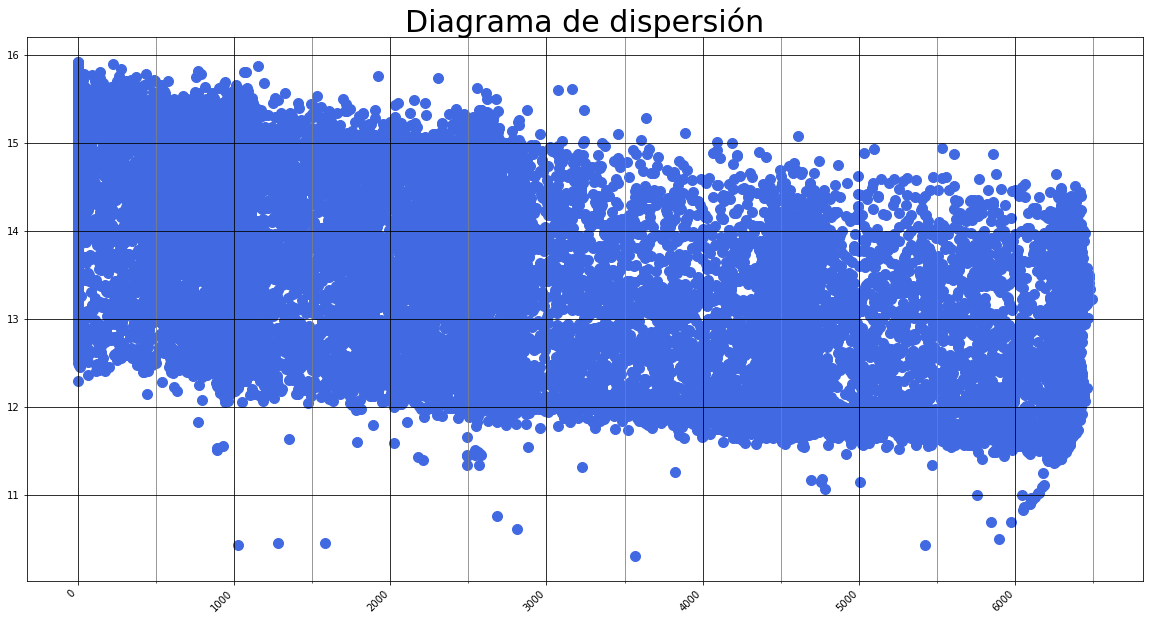

In [ ]:
#@title Diagrama de Dispersión
fig1, ax = plt.subplots(1, figsize=(20,10))
ax.scatter(dfx['FQI165'],dfx['PIR161'],color='royalblue',s=100)
#ax.scatter(EAF4['FQI169'],EAF4['PIR161'],color='Orange',s=100)
labels = ax.get_xticklabels()
labels1= ax.get_yticklabels()
plt.setp(labels, rotation=45,fontsize=10, horizontalalignment='right')
plt.setp(labels1,fontsize=10, horizontalalignment='right')

ax.xaxis.set_major_locator(MultipleLocator(1000),)
ax.xaxis.set_minor_locator(MultipleLocator(500),)
ax.axes.grid(True, which='minor',color='grey',axis='both')
ax.axes.grid(True, which='major',color='black',axis='both')
fig1.show()
ax.set_title('Diagrama de dispersión',fontsize=30)
#ax.set_xlabel(text,fontsize=20)
#ax.set_ylabel(text1,fontsize=20)
ax.autoscale_view()



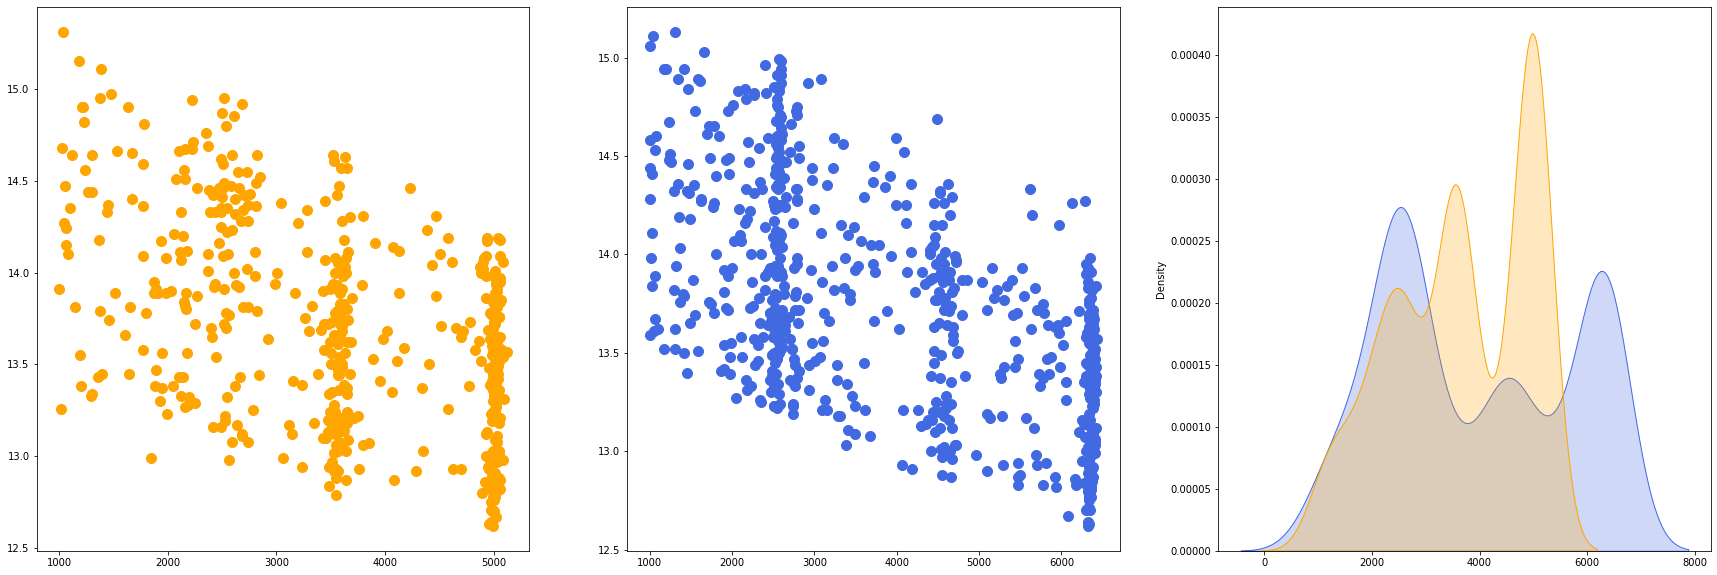

In [ ]:

Aux=np.array(EAF5['FQI165'])
Aux0=np.array(EAF4['FQI169'])
fig,(ax,ax1,ax2)= plt.subplots(1,3, figsize=(30,10))
ax1.scatter(EAF5['FQI165'],EAF5['PIR161'],color='royalblue',s=100)
ax.scatter(EAF4['FQI169'],EAF4['PIR161'],color='Orange',s=100)
ax=sb.kdeplot(data=Aux,shade=True,color='royalblue')
ax=sb.kdeplot(data=Aux0,shade=True,color='orange')
plt.show()

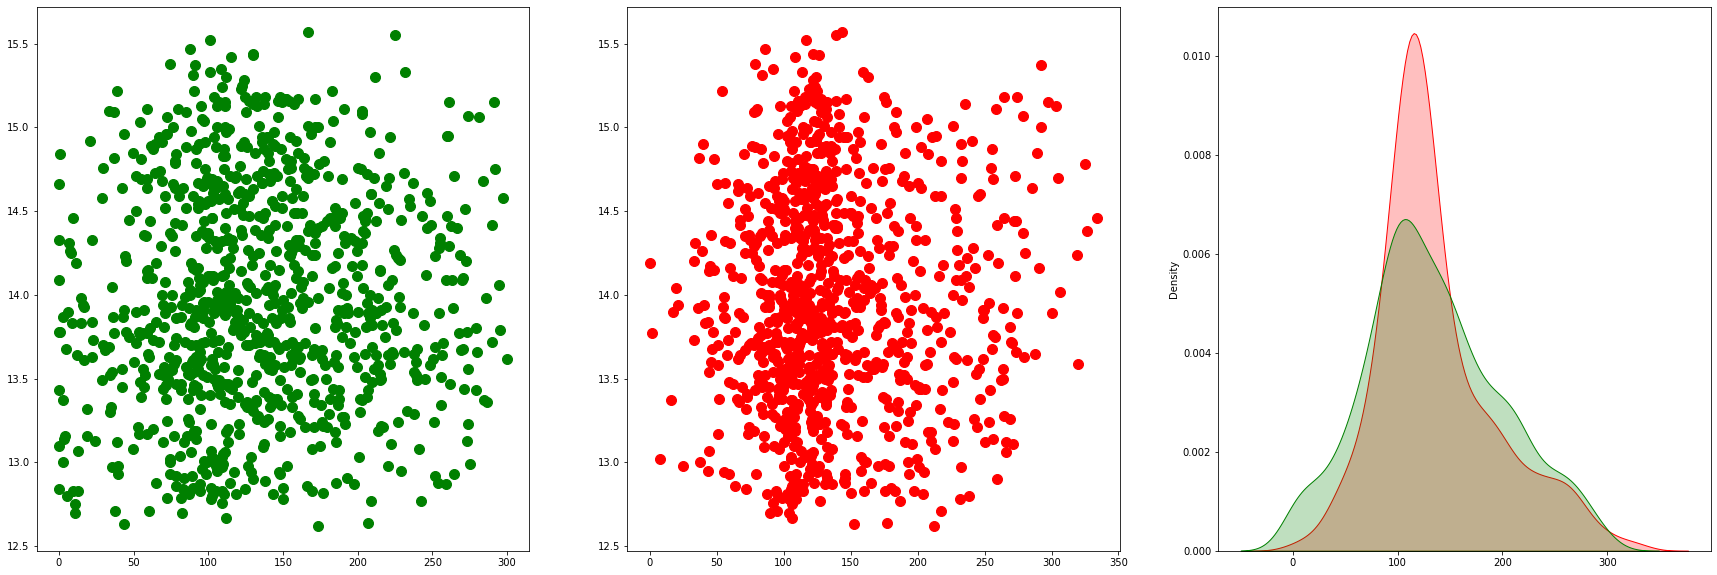

In [ ]:

Aux1=np.array(CC3['FQI173'])
Aux2=np.array(CC2['FQI177'])
fig,(ax,ax1,ax2)= plt.subplots(1,3, figsize=(30,10))
ax1.scatter(CC3['FQI173'],CC3['PIR161'],color='red',s=100)
ax.scatter(CC2['FQI177'],CC2['PIR161'],color='green',s=100)
ax=sb.kdeplot(data=Aux1,shade=True, color='red')
ax=sb.kdeplot(data=Aux2,shade=True, color ='green')
plt.show()




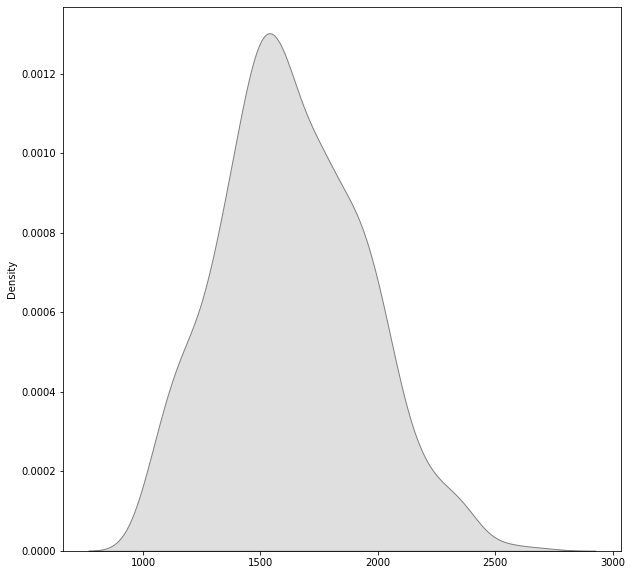

In [61]:
Aux5=np.array(Resto['FQI151'])
fig,(ax5)= plt.subplots(1, figsize=(10,10))
ax=sb.kdeplot(data=Aux5,shade=True, color ='grey')
#ax3=sb.displot(data=Aux1,color='red')
#ax4=sb.displot(data=Aux2)


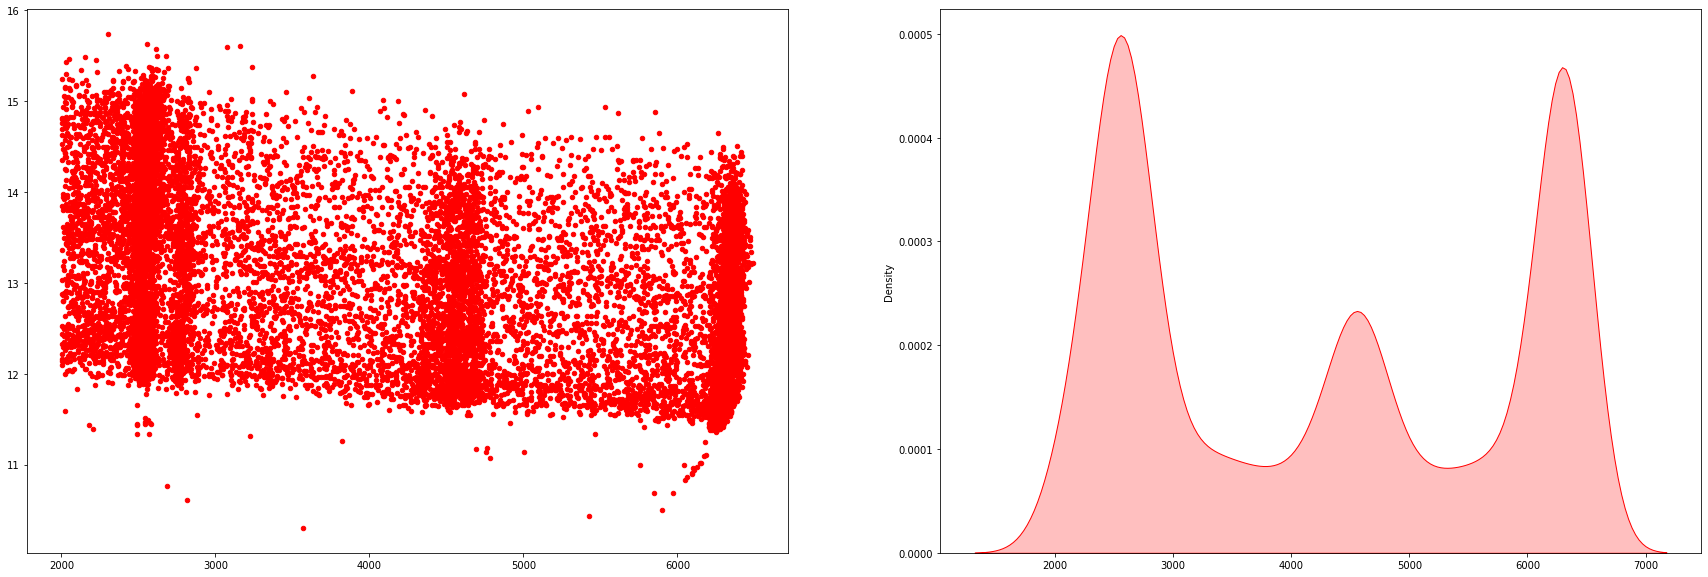

In [67]:
Aux=dfx.loc[dfx['FQI165']>=2000]
Aux1=np.array(Aux['FQI165'])
fig,(ax,ax1)= plt.subplots(1,2, figsize=(30,10))
ax.scatter(Aux['FQI165'],Aux['PIR161'],color='red',s=20)
ax1=sb.kdeplot(data=Aux1,shade=True, color ='red')
plt.show()


In [ ]:
ax1=sb.kdeplot(data=Aux1,shade=True, color ='red')